In [23]:
import os
import sys
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/eecs/jahnavis/miniconda/envs/EpitomeNewEnv2/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Results Path
internals_results_dir = "results/internals_results/"

internals_preds = os.path.join(internals_results_dir, "epitome_preds")
internals_models = os.path.join(internals_results_dir, "epitome_models")
internals_results = os.path.join(internals_results_dir, "epitome_results")

In [7]:
for TF_dir in os.listdir(internals_results):
    full_TF_dir = os.path.join(internals_results, TF_dir)
    curr_TF = TF_dir.split("_")[0]
    for p in os.listdir(full_TF_dir):
        splt = p.split("%s_no_motif_5000_train" % curr_TF)
        print(splt)


['ZNF384_no_motif_early_stop_5000.csv']
['ZNF384_no_motif.csv']
['ZNF384_no_motif_early_stop_1000.csv']
['ZNF384_no_motif_15000_train.csv']
['ZNF384_no_motif_early_stop_15000_train_1000.csv']
['ZNF384_no_motif_early_stop_15000_train_5000.csv']
['ZNF384_no_motif_15000_train19Jul2020_2359.csv']
['ZNF384_no_motif_early_stop_15000_train_100019Jul2020_2359.csv']
['ZNF384_no_motif_early_stop_15000_train_500019Jul2020_2359.csv']
['', '20Jul2020_1443.csv']
['ZNF384_no_motif_early_stop_15000_train_100020Jul2020_1443.csv']
['ZNF384_no_motif_early_stop_15000_train_500020Jul2020_1443.csv']
['', '_21Jul2020_1003.csv']
['ZNF274_no_motif_early_stop_1000.csv']
['ZNF274_no_motif.csv']
['ZNF274_no_motif_early_stop_5000.csv']
['ZNF274_no_motif_early_stop_15000_train_1000.csv']
['ZNF274_no_motif_15000_train.csv']
['ZNF274_no_motif_early_stop_15000_train_5000.csv']
['ZNF274_no_motif_early_stop_15000_train_100019Jul2020_2359.csv']
['ZNF274_no_motif_15000_train19Jul2020_2359.csv']
['ZNF274_no_motif_early_sto

In [ ]:
model_results = pd.DataFrame(columns = ['TF', 'Early', 'Train Iters', 'Max Train Iters', 'Train Valid Iters', 
                                        'auPRC', 'auROC', 'Date'])

for TF_dir in os.listdir(internals_results):
    splt = TF_dir.split("_")
    # Look at single TFs only
    if len(splt) > 2:
        continue
    # Only look at TFs 
    curr_TF = splt[0]
    if (curr_TF == ".ipynb"):
        continue
    full_TF_dir = os.path.join(internals_results, TF_dir)
    
    for file_path in os.listdir(full_TF_dir):
        if file_path == "%s_no_motif.csv" % curr_TF:
            pd.read_csv(file_path, sep="\t")


In [8]:
model_results = pd.DataFrame(columns = ['TF', 'No Early auROC', 'No Early auPRC', 'No Early Train Iters',
                                        'Early 1000 auROC', 'Early 1000 auPRC', 'Early 1000 Train Iters',
                                        'Early 5000 auROC', 'Early 5000 auPRC', 'Early 5000 Train Iters',
                                        'No Early 15000 auROC', 'No Early 15000 auPRC', 'No Early 15000 Train Iters',
                                        'Early 1000, 15000 auROC', 'Early 1000, 15000 auPRC', 'Early 1000, 15000 Train Iters',
                                        'Early 5000, 15000 auROC', 'Early 5000, 15000 auPRC', 'Early 5000, 15000 Train Iters'])

files_to_rerun = []

for TF_dir in os.listdir(internals_results):
    splt = TF_dir.split("_")
    # Look at single TFs only
    if len(splt) > 2:
        continue
        
    curr_TF = splt[0]
    if (curr_TF == ".ipynb"):
        continue
#     TFs.append(curr_TF)
    full_TF_dir = os.path.join(internals_results, TF_dir)
    
    no_early_auROC, no_early_auPRC, no_early_train_iters = "DNE", "DNE", "DNE"
    early_1000_auROC, early_1000_auPRC, early_1000_train_iters = "DNE", "DNE", "DNE"
    early_5000_auROC, early_5000_auPRC, early_5000_train_iters = "DNE", "DNE", "DNE"
    
    no_early_15000_auROC, no_early_15000_auPRC, no_early_15000_train_iters = "DNE", "DNE", "DNE"
    early_1000_15000_auROC, early_1000_15000_auPRC, early_1000_15000_train_iters = "DNE", "DNE", "DNE"
    early_5000_15000_auROC, early_5000_15000_auPRC, early_5000_15000_train_iters = "DNE", "DNE", "DNE"

    
    try:
        no_early_path = os.path.join(full_TF_dir, "%s_no_motif.csv" % curr_TF)
        no_early_csv = pd.read_csv(no_early_path, sep="\t")
        if (np.isnan(no_early_csv['auPRC'][0]) or np.isnan(no_early_csv['auROC'][0])):
            files_to_rerun.append(no_early_path)
            
        no_early_auPRC = no_early_csv['auPRC'][0]
        no_early_auROC = no_early_csv['auROC'][0]
        no_early_trained_iters = no_early_csv['iters_trained'][0]
    except:
        print("Unexpected error:", sys.exc_info()[0])
        files_to_rerun.append(no_early_path)
    try:
        early_1000_path = os.path.join(full_TF_dir, "%s_no_motif_early_stop_1000.csv" % curr_TF)
        early_1000_csv = pd.read_csv(early_1000_path, sep="\t")
        if (np.isnan(early_1000_csv['auPRC'][0]) or np.isnan(early_1000_csv['auROC'][0])):
            files_to_rerun.append(early_1000_path)

        early_1000_auPRC = early_1000_csv['auPRC'][0]
        early_1000_auROC = early_1000_csv['auROC'][0]
        early_1000_trained_iters = early_1000_csv['iters_trained'][0]
    except:
        print("Unexpected 1000 error:", sys.exc_info()[0])
        files_to_rerun.append(early_1000_path)
    try:
        early_5000_path = os.path.join(full_TF_dir, "%s_no_motif_early_stop_5000.csv" % curr_TF)
        early_5000_csv = pd.read_csv(early_5000_path, sep="\t")
        if (np.isnan(early_5000_csv['auPRC'][0]) or np.isnan(early_5000_csv['auROC'][0])):
            files_to_rerun.append(early_5000_path)

        early_5000_auPRC = early_5000_csv['auPRC'][0]
        early_5000_auROC = early_5000_csv['auROC'][0]
        early_5000_trained_iters = early_5000_csv['iters_trained'][0]
    except:
        print("Unexpected 5000 error:", sys.exc_info()[0])
        files_to_rerun.append(early_5000_path)
    
    # More trained model data
    try:
        no_early_15000_path = os.path.join(full_TF_dir, "%s_no_motif_15000_train.csv" % curr_TF)
        no_early_15000_csv = pd.read_csv(no_early_15000_path, sep="\t")
        if (np.isnan(no_early_15000_csv['auPRC'][0]) or np.isnan(no_early_15000_csv['auROC'][0])):
            files_to_rerun.append(no_early_15000_path)
            
        no_early_15000_auPRC = no_early_15000_csv['auPRC'][0]
        no_early_15000_auROC = no_early_15000_csv['auROC'][0]
        no_early_15000_trained_iters = no_early_15000_csv['iters_trained'][0]
    except:
        print("Unexpected error:", sys.exc_info()[0])
        files_to_rerun.append(no_early_15000_path)
    try:
        early_1000_path = os.path.join(full_TF_dir, "%s_no_motif_early_stop_15000_train_1000.csv" % curr_TF)
        early_1000_csv = pd.read_csv(early_1000_path, sep="\t")
        if (np.isnan(early_1000_csv['auPRC'][0]) or np.isnan(early_1000_csv['auROC'][0])):
            files_to_rerun.append(early_1000_path)

        early_1000_15000_auPRC = early_1000_csv['auPRC'][0]
        early_1000_15000_auROC = early_1000_csv['auROC'][0]
        early_1000_15000_trained_iters = early_1000_csv['iters_trained'][0]
    except:
        print("Unexpected 1000 error:", sys.exc_info()[0])
        files_to_rerun.append(early_1000_path)
    try:
        early_5000_path = os.path.join(full_TF_dir, "%s_no_motif_early_stop_15000_train_5000.csv" % curr_TF)
        early_5000_csv = pd.read_csv(early_5000_path, sep="\t")
        if (np.isnan(early_5000_csv['auPRC'][0]) or np.isnan(early_5000_csv['auROC'][0])):
            files_to_rerun.append(early_5000_path)

        early_5000_15000_auPRC = early_5000_csv['auPRC'][0]
        early_5000_15000_auROC = early_5000_csv['auROC'][0]
        early_5000_15000_trained_iters = early_5000_csv['iters_trained'][0]
    except:
        print("Unexpected 5000 error:", sys.exc_info()[0])
        files_to_rerun.append(early_5000_path)
        
    model_results = model_results.append({ 
        'TF' : curr_TF,
        'No Early auROC': no_early_auROC,
        'No Early auPRC': no_early_auPRC,
        'No Early Train Iters': no_early_trained_iters,
        
        'Early 1000 auROC': early_1000_auROC,
        'Early 1000 auPRC': early_1000_auPRC,
        'Early 1000 Train Iters': early_1000_trained_iters,
        
        'Early 5000 auROC': early_5000_auROC,
        'Early 5000 auPRC': early_5000_auPRC,
        'Early 5000 Train Iters': early_5000_trained_iters,
        
        'No Early 15000 auROC': no_early_15000_auROC, 
        'No Early 15000 auPRC': no_early_15000_auPRC, 
        'No Early 15000 Train Iters': no_early_15000_trained_iters,
                                        
        'Early 1000, 15000 auROC': early_1000_15000_auROC, 
        'Early 1000, 15000 auPRC': early_1000_15000_auPRC, 
        'Early 1000, 15000 Train Iters': early_1000_15000_train_iters,
                                        
        'Early 5000, 15000 auROC': early_5000_15000_auROC, 
        'Early 5000, 15000 auPRC': early_5000_15000_auPRC, 
        'Early 5000, 15000 Train Iters': early_5000_15000_trained_iters}, 
         ignore_index=True)
model_results.to_csv(os.path.join(internals_results_dir, "model_results.csv"))

In [9]:
model_results

,TF,No Early auROC,No Early auPRC,No Early Train Iters,Early 1000 auROC,Early 1000 auPRC,Early 1000 Train Iters,Early 5000 auROC,Early 5000 auPRC,Early 5000 Train Iters,No Early 15000 auROC,No Early 15000 auPRC,No Early 15000 Train Iters,"Early 1000, 15000 auROC","Early 1000, 15000 auPRC","Early 1000, 15000 Train Iters","Early 5000, 15000 auROC","Early 5000, 15000 auPRC","Early 5000, 15000 Train Iters"
0,ZNF384,0.999600,0.528571,4999.0,0.999767,0.609524,3000.0,0.999667,0.555556,4999.0,0.999800,0.633333,15000.0,0.998166,0.388580,DNE,0.998733,0.410534,9000.0
1,ZNF274,NaN,NaN,4999.0,NaN,NaN,4000.0,NaN,NaN,4000.0,NaN,NaN,15000.0,NaN,NaN,DNE,NaN,NaN,5000.0
2,ZNF24,0.997793,0.594773,4999.0,0.998000,0.615453,4999.0,0.998016,0.632137,4999.0,0.998887,0.766671,15000.0,0.998696,0.697981,DNE,0.998251,0.663599,8000.0
3,ZNF143,0.996534,0.570652,4999.0,0.996821,0.565575,3000.0,0.996774,0.575012,4999.0,0.997529,0.659624,15000.0,0.997254,0.590629,DNE,0.997207,0.593448,11000.0
4,ZKSCAN1,0.997054,0.676653,4999.0,0.996218,0.641741,4000.0,0.997249,0.683770,4999.0,0.996501,0.707785,15000.0,0.997091,0.681156,DNE,0.997082,0.701234,11000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,ATF7,0.996437,0.678034,5000.0,0.996602,0.681146,3000.0,0.996526,0.688375,4999.0,0.997555,0.780507,15000.0,0.996376,0.657775,DNE,0.997417,0.766956,15000.0
81,ATF3,0.996978,0.574104,5000.0,0.996686,0.626097,3000.0,0.995462,0.497272,4999.0,0.999101,0.860405,15000.0,0.998832,0.840860,DNE,0.998799,0.830848,15000.0
82,ATF2,0.996016,0.585334,5000.0,0.996312,0.611859,4999.0,0.996144,0.605396,4999.0,0.996574,0.631351,15000.0,0.995699,0.570777,DNE,0.995327,0.548360,6000.0
83,ARNT,0.998290,0.432209,5000.0,0.998183,0.439769,4999.0,0.998133,0.418021,4999.0,0.998462,0.528600,15000.0,0.998190,0.514750,DNE,0.997790,0.494604,15000.0


In [3]:
## Grab auROC and auPRC for all TF results

# TFs = []
# # auPRC for 1
# no_early_auPRC = []
# early_1000_auPRC = []
# early_5000_auPRC = []
# no_early_15000_auPRC = []
# early_15000_1000_auPRC = []
# early_15000_5000_auPRC = []

# no_early_auROC = []
# early_1000_auROC = []
# early_5000_auROC = []

# no_early_15000_auROC = []
# early_15000_1000_auROC = []
# early_15000_5000_auROC = []

# no_early_trained_iters = []
# early_1000_trained_iters = []
# early_5000_trained_iters = []

# no_early_15000_trained_iters = []
# early_15000_1000_trained_iters = []
# early_15000_5000_trained_iters = []

# files_to_rerun = []


# for TF_dir in os.listdir(internals_results):
#     curr_TF = TF_dir.split("_")[0]
#     if (curr_TF == ".ipynb"):
#         continue
# #     TFs.append(curr_TF)
#     full_TF_dir = os.path.join(internals_results, TF_dir)
#     no_early_auROC, no_early_auPRC, no_early_train_iters = 0, 0, 0
    
#     try:
#         no_early_path = os.path.join(full_TF_dir, "%s_no_motif.csv" % curr_TF)
#         no_early_csv = pd.read_csv(no_early_path, sep="\t")
#         if (np.isnan(no_early_csv['auPRC'][0]) or np.isnan(no_early_csv['auROC'][0])):
#             files_to_rerun.append(no_early_path)
# #             no_early_auPRC.append("DNE")
# #             no_early_auROC.append("DNE")
# #         else:
#         no_early_auPRC.append(no_early_csv['auPRC'][0])
#         no_early_auROC.append(no_early_csv['auROC'][0])
#         no_early_trained_iters.append(no_early_csv['iters_trained'][0])
#     except:
#         print("Unexpected error:", sys.exc_info()[0])
#         files_to_rerun.append(no_early_path)
#         no_early_auPRC.append("DNE")
#         no_early_auROC.append("DNE")
#         no_early_trained_iters.append("DNE")
#     try:
#         early_1000_path = os.path.join(full_TF_dir, "%s_no_motif_early_stop_1000.csv" % curr_TF)
#         early_1000_csv = pd.read_csv(early_1000_path, sep="\t")
#         if (np.isnan(early_1000_csv['auPRC'][0]) or np.isnan(early_1000_csv['auROC'][0])):
#             files_to_rerun.append(early_1000_path)
# #             no_early_auPRC.append("DNE")
# #             no_early_auROC.append("DNE")
# #         else:
#         early_1000_auPRC.append(early_1000_csv['auPRC'][0])
#         early_1000_auROC.append(early_1000_csv['auROC'][0])
#         early_1000_trained_iters.append(early_1000_csv['iters_trained'][0])
#     except:
#         print("Unexpected 1000 error:", sys.exc_info()[0])
#         files_to_rerun.append(early_1000_path)
#         early_1000_auPRC.append("DNE")
#         early_1000_auROC.append("DNE")
#         early_1000_trained_iters.append("DNE")
#     try:
#         early_5000_path = os.path.join(full_TF_dir, "%s_no_motif_early_stop_5000.csv" % curr_TF)
#         early_5000_csv = pd.read_csv(early_5000_path, sep="\t")
#         if (np.isnan(early_5000_csv['auPRC'][0]) or np.isnan(early_5000_csv['auROC'][0])):
#             files_to_rerun.append(early_5000_path)
# #             no_early_auPRC.append("DNE")
# #             no_early_auROC.append("DNE")
# #         else:
#         early_5000_auPRC.append(early_5000_csv['auPRC'][0])
#         early_5000_auROC.append(early_5000_csv['auROC'][0])
#         early_5000_trained_iters.append(early_5000_csv['iters_trained'][0])
#     except:
#         print("Unexpected 5000 error:", sys.exc_info()[0])
#         files_to_rerun.append(early_5000_path)
#         early_5000_auPRC.append("DNE")
#         early_5000_auROC.append("DNE")
#         early_5000_trained_iters.append("DNE")
#     try:
#         early_5000_path = os.path.join(full_TF_dir, 
#                                        "%s_no_motif_early_stop_15000_train_5000.csv" % curr_TF)
#         early_5000_csv = pd.read_csv(early_5000_path, sep="\t")
#         if (np.isnan(early_5000_csv['auPRC'][0]) or np.isnan(early_5000_csv['auROC'][0])):
#             files_to_rerun.append(early_5000_path)
# #             no_early_auPRC.append("DNE")
# #             no_early_auROC.append("DNE")
# #         else:
#         early_5000_auPRC.append(early_5000_csv['auPRC'][0])
#         early_5000_auROC.append(early_5000_csv['auROC'][0])
#         early_5000_trained_iters.append(early_5000_csv['iters_trained'][0])
#     except:
#         print("Unexpected 5000 error:", sys.exc_info()[0])
#         files_to_rerun.append(early_5000_path)
#         early_5000_auPRC.append("DNE")
#         early_5000_auROC.append("DNE")
#         early_5000_trained_iters.append("DNE")

Unexpected error: <class 'FileNotFoundError'>
Unexpected 1000 error: <class 'FileNotFoundError'>
Unexpected 5000 error: <class 'FileNotFoundError'>
Unexpected error: <class 'FileNotFoundError'>
Unexpected 1000 error: <class 'FileNotFoundError'>
Unexpected 5000 error: <class 'FileNotFoundError'>
Unexpected error: <class 'FileNotFoundError'>
Unexpected 1000 error: <class 'FileNotFoundError'>
Unexpected 5000 error: <class 'FileNotFoundError'>
Unexpected error: <class 'FileNotFoundError'>
Unexpected 1000 error: <class 'FileNotFoundError'>
Unexpected 5000 error: <class 'FileNotFoundError'>
Unexpected error: <class 'FileNotFoundError'>
Unexpected 1000 error: <class 'FileNotFoundError'>
Unexpected 5000 error: <class 'FileNotFoundError'>
Unexpected error: <class 'FileNotFoundError'>
Unexpected 1000 error: <class 'FileNotFoundError'>
Unexpected 5000 error: <class 'FileNotFoundError'>
Unexpected error: <class 'FileNotFoundError'>
Unexpected 1000 error: <class 'FileNotFoundError'>
Unexpected 5000

In [21]:
files_to_rerun

['results/internals_results/epitome_results/ZNF274_results/ZNF274_no_motif.csv',
 'results/internals_results/epitome_results/ZNF274_results/ZNF274_no_motif_early_stop_1000.csv',
 'results/internals_results/epitome_results/ZNF274_results/ZNF274_no_motif_early_stop_5000.csv',
 'results/internals_results/epitome_results/ZNF274_results/ZNF274_no_motif_15000_train.csv',
 'results/internals_results/epitome_results/ZNF274_results/ZNF274_no_motif_early_stop_15000_train_1000.csv',
 'results/internals_results/epitome_results/ZNF274_results/ZNF274_no_motif_early_stop_15000_train_5000.csv',
 'results/internals_results/epitome_results/ELK1_results/ELK1_no_motif.csv',
 'results/internals_results/epitome_results/ELK1_results/ELK1_no_motif_early_stop_1000.csv',
 'results/internals_results/epitome_results/ELK1_results/ELK1_no_motif_early_stop_5000.csv',
 'results/internals_results/epitome_results/ELK1_results/ELK1_no_motif_15000_train.csv',
 'results/internals_results/epitome_results/ELK1_results/ELK1_

In [88]:
files_to_rerun = pd.Series(files_to_rerun)
files_to_rerun_conc = "/home/eecs/jahnavis/epitome_new/epitome-1/" + files_to_rerun
files_to_rerun_conc.to_csv(os.path.join(internals_results_dir, "files_to_rerun.csv"))
files_to_rerun_conc

0    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
1    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
2    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
3    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
4    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
5    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
6    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
7    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
8    /home/eecs/jahnavis/epitome_new/epitome-1/resu...
dtype: object

In [6]:
# Save Compiled Results to CSV
df = pd.DataFrame(list(zip(TFs, no_early_auROC, no_early_auPRC, no_early_trained_iters,
                           early_1000_auROC, early_1000_auPRC, early_1000_trained_iters,
                           early_5000_auROC, early_5000_auPRC, early_5000_trained_iters)), 
                  columns =['TF', 'No Early auROC', 'No Early auPRC', 'No Early Train Iters',
                            'Early 1000 auROC', 'Early 1000 auPRC', 'Early 1000 Train Iters',
                            'Early 5000 auROC', 'Early 5000 auPRC', 'Early 5000 Train Iters'])
df.to_csv(os.path.join(internals_results_dir, "TF_results.csv"))

In [3]:
# Load saved DF
# df_p = os.path.join(internals_results_dir, "TF_results.csv")
df_p = os.path.join(internals_results_dir, "model_results.csv")
df = pd.read_csv(df_p)
# Clean missing values 
df_cleaned = df.replace("DNE", 0)
df_cleaned = df_cleaned.fillna(0)

df_cleaned['No Early auPRC'] = df_cleaned['No Early auPRC'].astype(float)
df_cleaned['No Early auROC'] = df_cleaned['No Early auROC'].astype(float)

df_cleaned['Early 1000 auPRC'] = df_cleaned['Early 1000 auPRC'].astype(float)
df_cleaned['Early 5000 auPRC'] = df_cleaned['Early 5000 auPRC'].astype(float)

df_cleaned['Early 1000 Train Iters'] = df_cleaned['Early 1000 Train Iters'].astype(float)
df_cleaned['Early 5000 Train Iters'] = df_cleaned['Early 5000 Train Iters'].astype(float)
df_cleaned.head()

,Unnamed: 0,TF,No Early auROC,No Early auPRC,No Early Train Iters,Early 1000 auROC,Early 1000 auPRC,Early 1000 Train Iters,Early 5000 auROC,Early 5000 auPRC,Early 5000 Train Iters,No Early 15000 auROC,No Early 15000 auPRC,No Early 15000 Train Iters,"Early 1000, 15000 auROC","Early 1000, 15000 auPRC","Early 1000, 15000 Train Iters","Early 5000, 15000 auROC","Early 5000, 15000 auPRC","Early 5000, 15000 Train Iters"
0,0,ZNF384,0.999600,0.528571,4999.0,0.999767,0.609524,3000.0,0.999667,0.555556,4999.0,0.999800,0.633333,15000.0,0.998166,0.388580,0,0.998733,0.410534,9000.0
1,1,ZNF274,0.000000,0.000000,4999.0,0.000000,0.000000,4000.0,0.000000,0.000000,4000.0,0.000000,0.000000,15000.0,0.000000,0.000000,0,0.000000,0.000000,5000.0
2,2,ZNF24,0.997793,0.594773,4999.0,0.998000,0.615453,4999.0,0.998016,0.632137,4999.0,0.998887,0.766671,15000.0,0.998696,0.697981,0,0.998251,0.663599,8000.0
3,3,ZNF143,0.996534,0.570652,4999.0,0.996821,0.565575,3000.0,0.996774,0.575012,4999.0,0.997529,0.659624,15000.0,0.997254,0.590629,0,0.997207,0.593448,11000.0
4,4,ZKSCAN1,0.997054,0.676653,4999.0,0.996218,0.641741,4000.0,0.997249,0.683770,4999.0,0.996501,0.707785,15000.0,0.997091,0.681156,0,0.997082,0.701234,11000.0


In [6]:
df_cleaned[df_cleaned['Early 5000, 15000 auPRC'] > df_cleaned['No Early 15000 auPRC']].shape

(30, 20)

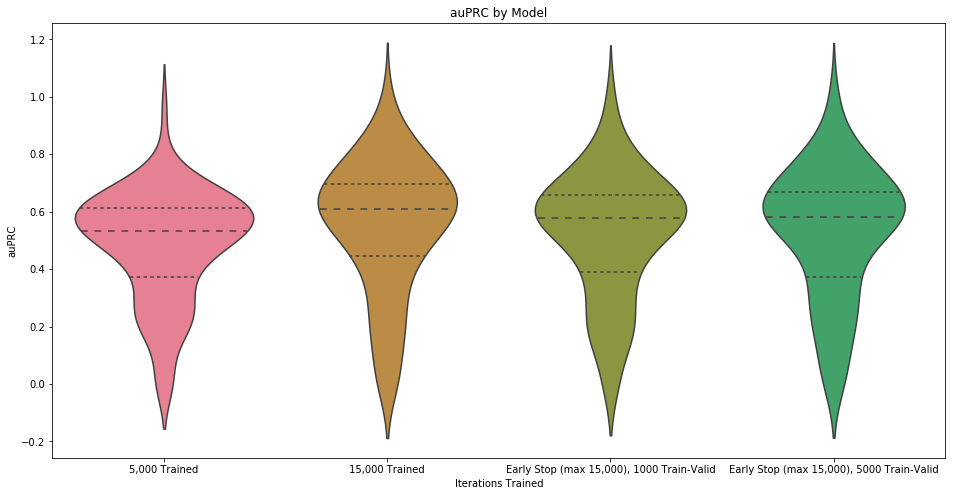

In [88]:
plt.figure(figsize=(16,8))

df_auPRCs = df_cleaned[['No Early auPRC', 'No Early 15000 auPRC',
                        'Early 1000, 15000 auPRC', 'Early 5000, 15000 auPRC']]
ax = sns.violinplot(data=df_auPRCs, palette=sns.color_palette("husl", 8), inner='quartile')
# sns.swarmplot(data=df_auPRCs)
ax.set(xticklabels=["5,000 Trained", "15,000 Trained", 
                    "Early Stop (max 15,000), 1000 Train-Valid",
                    "Early Stop (max 15,000), 5000 Train-Valid"],
       xlabel="Iterations Trained",
       ylabel="auPRC",
       title= "auPRC by Model");

[Text(0, 0.5, 'Baseline auROC'),
 Text(0.5, 0, 'Early Stopping auROC (1,000 Train Valid Points)'),
 Text(0.5, 1.0, 'Early Stopping vs. Baseline auROC (Max 15,000 Training Points)')]

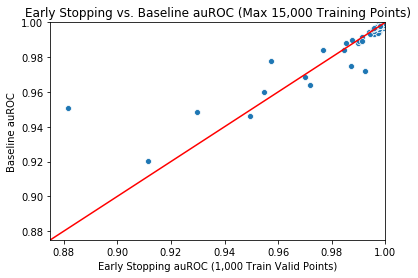

In [65]:
x = np.linspace(0, 1, 100)
# plt.figure(figsize=(25,15))

ax = sns.scatterplot(x = 'Early 1000, 15000 auROC', 
                y= 'No Early 15000 auROC', 
                data=df_cleaned)
sns.lineplot(x = x, y = x, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

# label_point(df_cleaned['Early 1000, 15000 auROC'],
#             df_cleaned['No Early 15000 auROC'], 
#             df_cleaned['TF'], 
#             plt.gca())  

plt.ylim(.875, 1)
plt.xlim(.875, 1)

ax.set(title="Early Stopping vs. Baseline auROC (Max 15,000 Training Points)",
       xlabel= "Early Stopping auROC (1,000 Train Valid Points)",
       ylabel= "Baseline auROC")

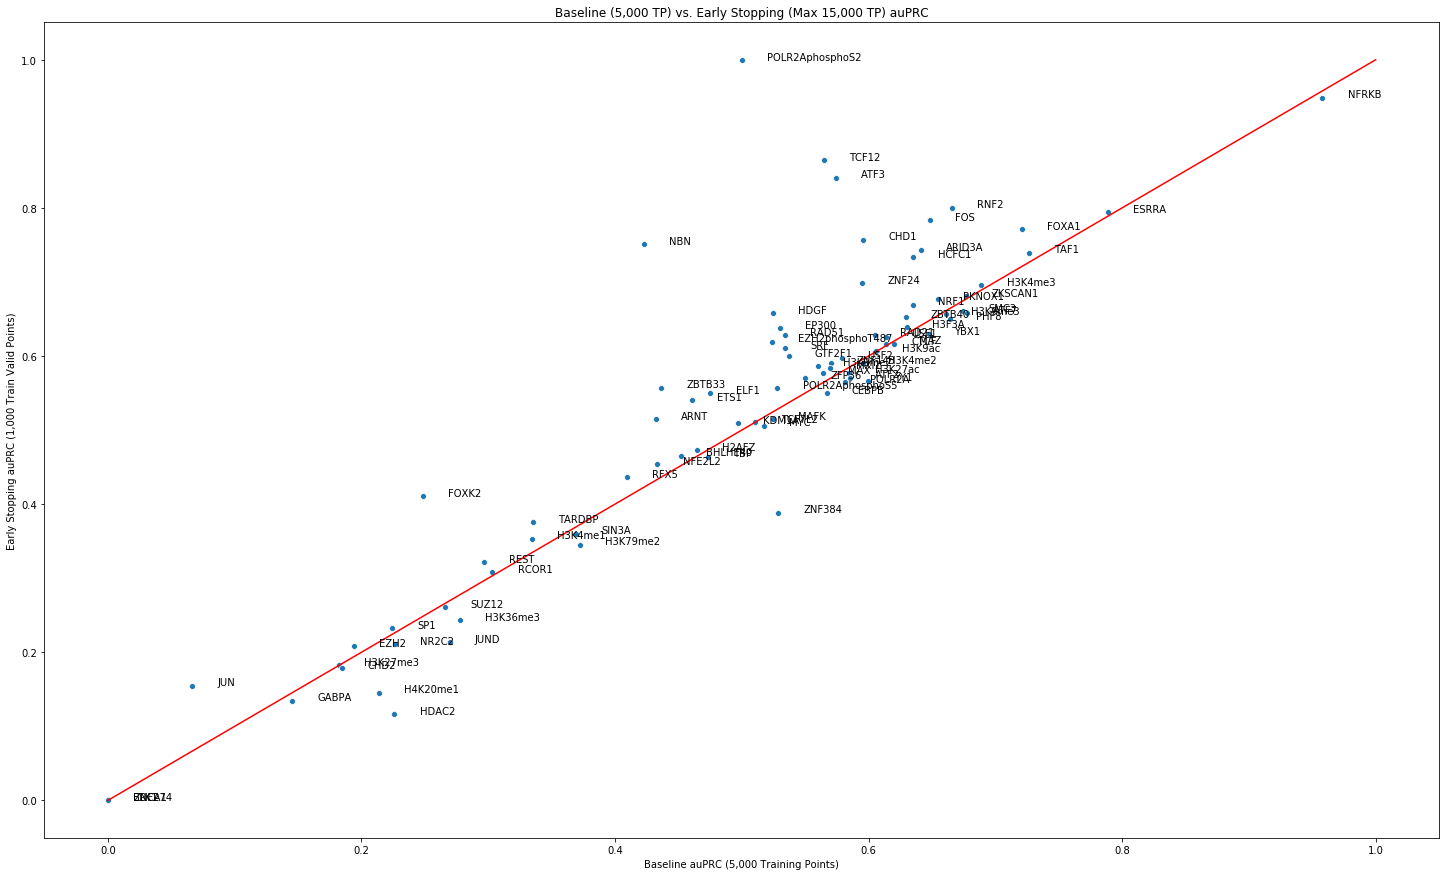

In [93]:
x = np.linspace(0, 1, 100)
plt.figure(figsize=(25,15))

ax = sns.scatterplot(y = 'Early 1000, 15000 auPRC', 
                x = 'No Early auPRC', 
                data=df_cleaned)
sns.lineplot(x = x, y = x, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_cleaned['No Early auPRC'], 
            df_cleaned['Early 1000, 15000 auPRC'],
            df_cleaned['TF'], 
            plt.gca())  

ax.set(title="Baseline (5,000 TP) vs. Early Stopping (Max 15,000 TP) auPRC",
       ylabel= "Early Stopping auPRC (1,000 Train Valid Points)",
       xlabel= "Baseline auPRC (5,000 Training Points)");

[Text(0, 0.5, 'Early Stopping auPRC (1,000 Train Valid Points)'),
 Text(0.5, 0, 'Baseline auPRC'),
 Text(0.5, 1.0, 'Early Stopping vs. Baseline auPRC (Max 15,000 Training Points)')]

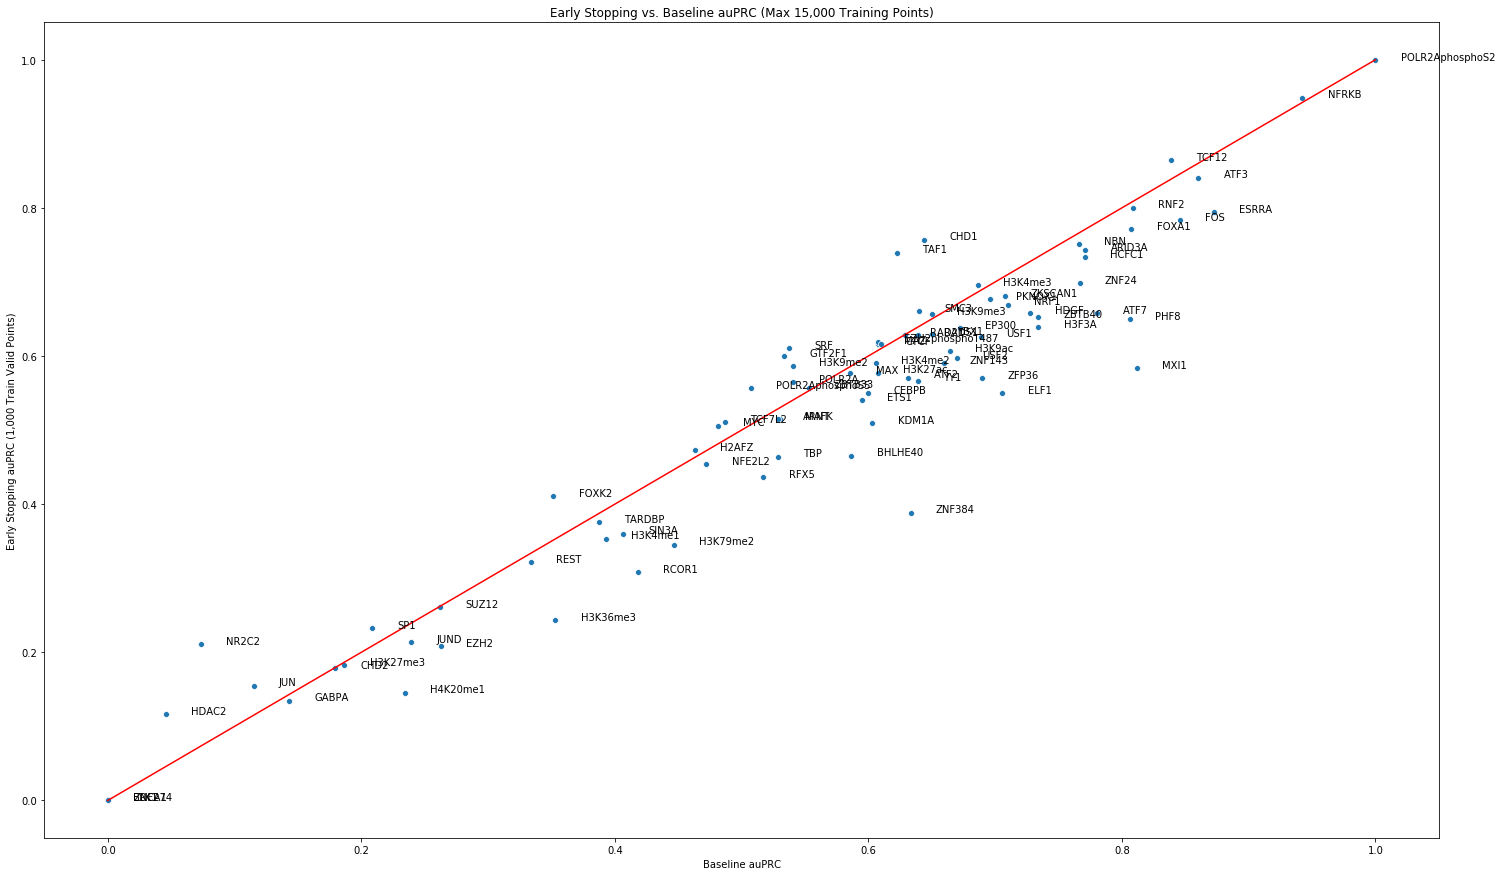

In [74]:
x = np.linspace(0, 1, 100)
plt.figure(figsize=(25,15))

ax = sns.scatterplot(y = 'Early 1000, 15000 auPRC', 
                x = 'No Early 15000 auPRC', 
                data=df_cleaned)
sns.lineplot(x = x, y = x, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_cleaned['No Early 15000 auPRC'], 
            df_cleaned['Early 1000, 15000 auPRC'],
            df_cleaned['TF'], 
            plt.gca())  

ax.set(title="Early Stopping vs. Baseline auPRC (Max 15,000 Training Points)",
       ylabel= "Early Stopping auPRC (1,000 Train Valid Points)",
       xlabel= "Baseline auPRC (Trained on 15,000 Points)")

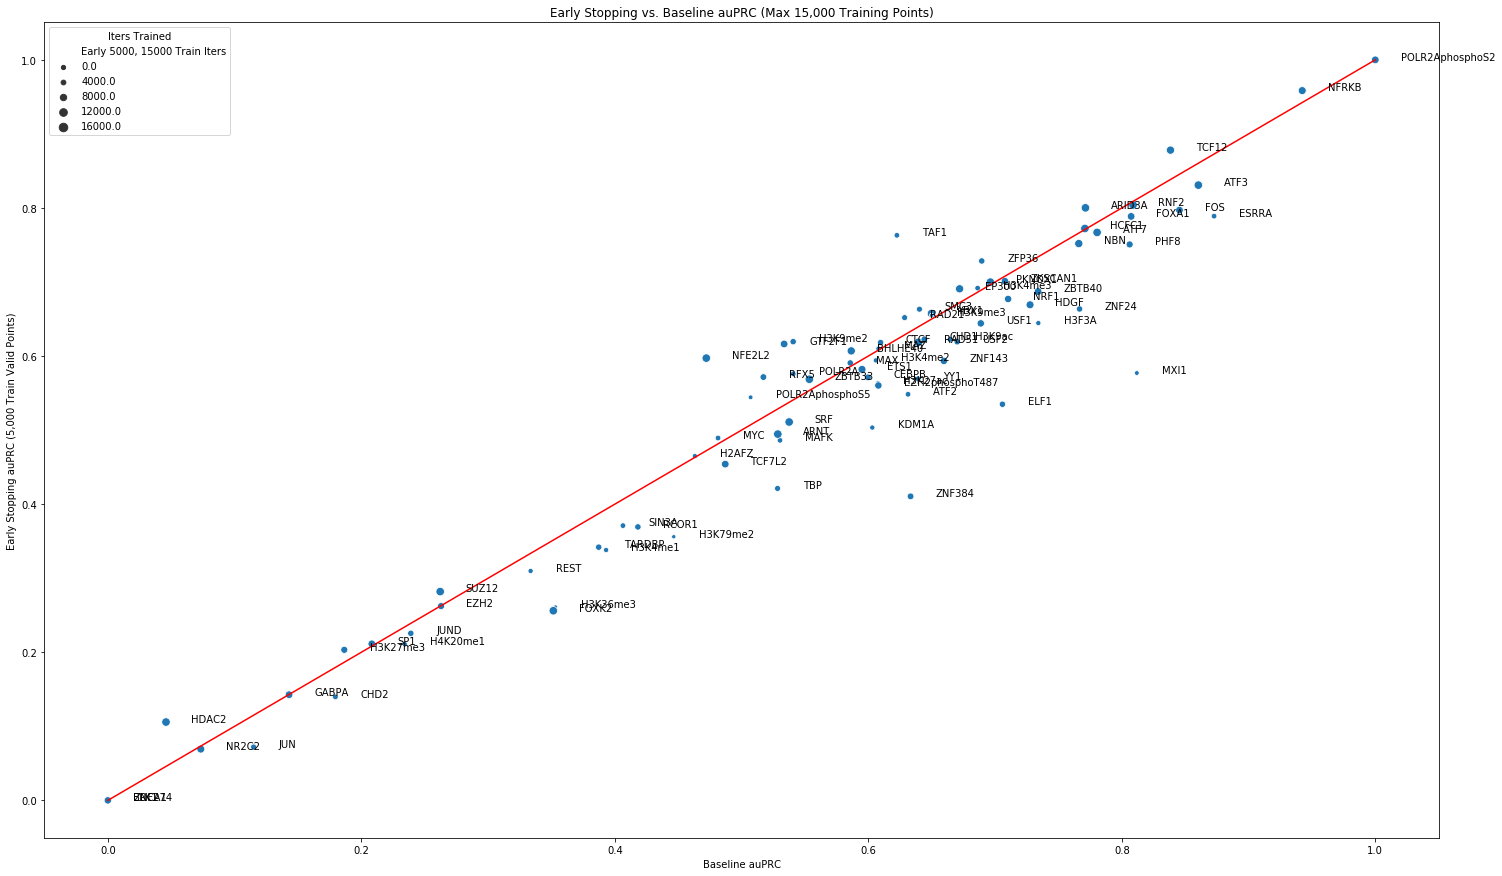

In [73]:
x = np.linspace(0, 1, 100)
plt.figure(figsize=(25,15))

ax = sns.scatterplot(y = 'Early 5000, 15000 auPRC', 
                x= 'No Early 15000 auPRC', 
                size = "Early 5000, 15000 Train Iters",
                data=df_cleaned)
sns.lineplot(x = x, y = x, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_cleaned['No Early 15000 auPRC'], 
            df_cleaned['Early 5000, 15000 auPRC'],
            df_cleaned['TF'], 
            plt.gca())  

ax.set(title="Early Stopping vs. Baseline auPRC (Max 15,000 Training Points)",
       ylabel= "Early Stopping auPRC (5,000 Train Valid Points)",
       xlabel= "Baseline auPRC (Trained on 15,000 points)")
plt.legend(title="Iters Trained")

In [ ]:
sns.violinplot()

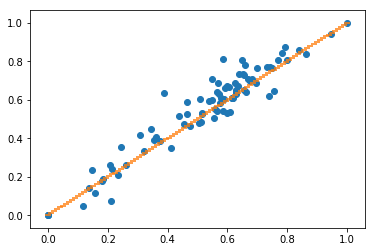

In [22]:
x = np.linspace(0, 1, 100)
plt.scatter(df_cleaned['Early 1000, 15000 auPRC'], df_cleaned['No Early 15000 auPRC'])
plt.scatter(x, x,marker='_')

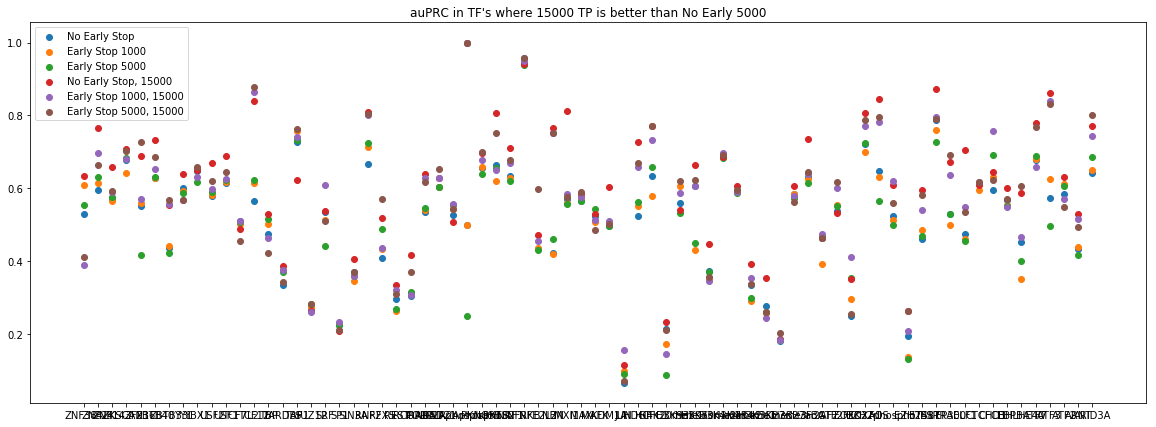

In [11]:
stopped_early = df_cleaned[df_cleaned['Early 5000, 15000 Train Iters'] != 15000]
trained_15000_better = df_cleaned[(df_cleaned['Early 5000, 15000 auPRC'] > df_cleaned['No Early auPRC']) | 
                                  (df_cleaned['Early 1000, 15000 auPRC'] > df_cleaned['No Early auPRC']) |
                                  (df_cleaned['No Early 15000 auPRC'] > df_cleaned['No Early auPRC'])]

plt.figure(figsize=(20,7))
df_cleaned_sub = trained_15000_better
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in TF's where 15000 TP is better than No Early 5000")
plt.legend();

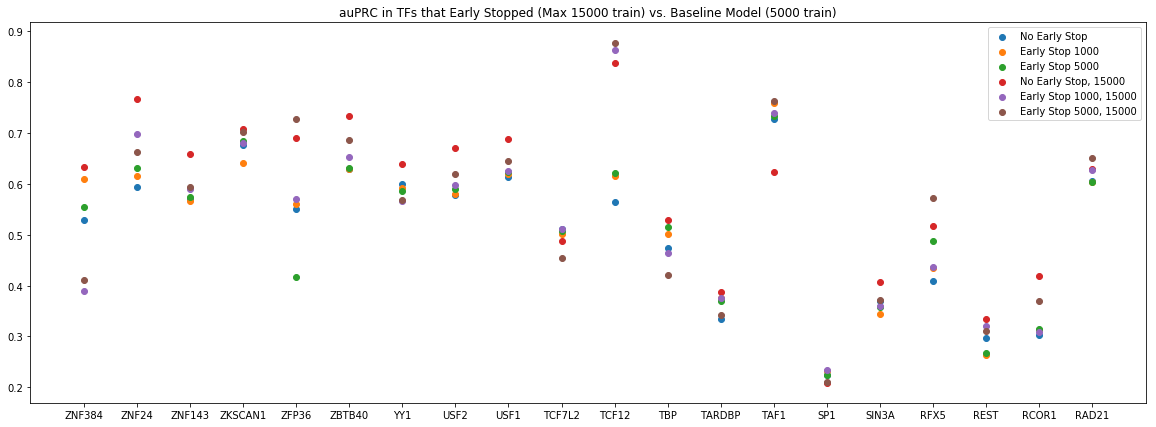

In [27]:
tfs_stopped_early_and_better_auprc = set(trained_15000_better["TF"]).intersection(set(stopped_early['TF']))
plt.figure(figsize=(20,7))
df_cleaned_sub = trained_15000_better[
    trained_15000_better['TF'].isin(tfs_stopped_early_and_better_auprc)][:20]
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in TFs that Early Stopped (Max 15000 train) vs. Baseline Model (5000 train)")
plt.legend();

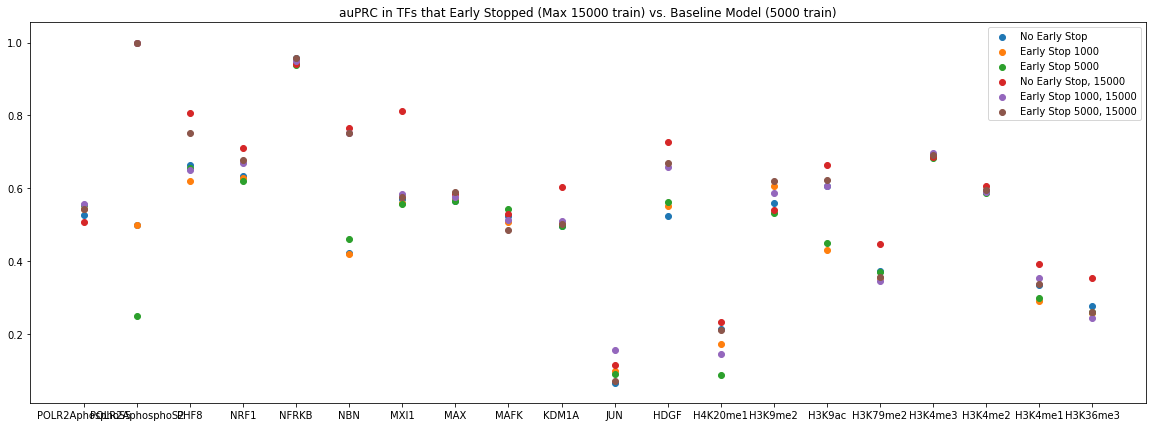

In [29]:
tfs_stopped_early_and_better_auprc = set(trained_15000_better["TF"]).intersection(set(stopped_early['TF']))
plt.figure(figsize=(20,7))
df_cleaned_sub = trained_15000_better[
    trained_15000_better['TF'].isin(tfs_stopped_early_and_better_auprc)][20:40]
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in TFs that Early Stopped (Max 15000 train) vs. Baseline Model (5000 train)")
plt.legend();

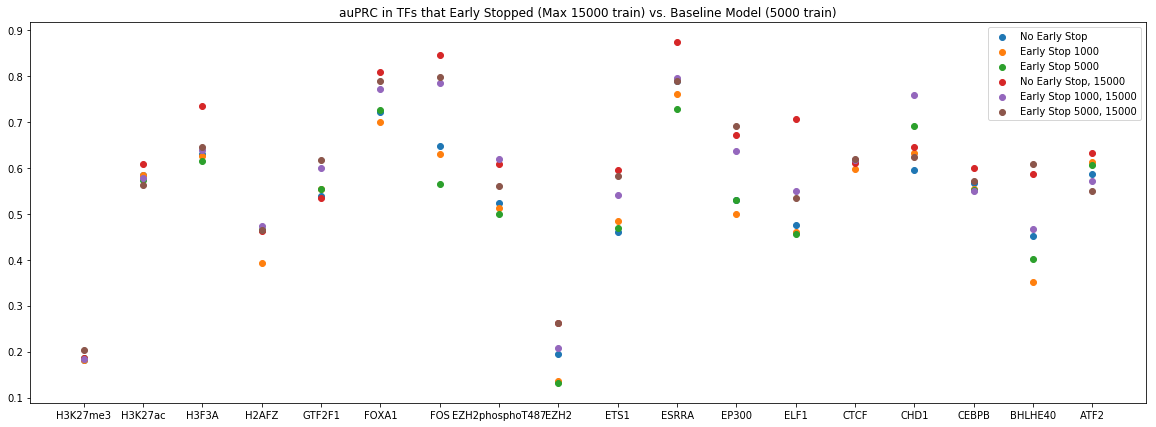

In [28]:
tfs_stopped_early_and_better_auprc = set(trained_15000_better["TF"]).intersection(set(stopped_early['TF']))
plt.figure(figsize=(20,7))
df_cleaned_sub = trained_15000_better[
    trained_15000_better['TF'].isin(tfs_stopped_early_and_better_auprc)][40:]
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in TFs that Early Stopped (Max 15000 train) vs. Baseline Model (5000 train)")
plt.legend();

In [19]:
stopped_early = df_cleaned[df_cleaned['Early 5000, 15000 Train Iters'] != 15000]
pd.merge(stopped_early, trained_15000_better, how="inner", on="TF")

,Unnamed: 0_x,TF,No Early auROC_x,No Early auPRC_x,No Early Train Iters_x,Early 1000 auROC_x,Early 1000 auPRC_x,Early 1000 Train Iters_x,Early 5000 auROC_x,Early 5000 auPRC_x,...,Early 5000 Train Iters_y,No Early 15000 auROC_y,No Early 15000 auPRC_y,No Early 15000 Train Iters_y,"Early 1000, 15000 auROC_y","Early 1000, 15000 auPRC_y","Early 1000, 15000 Train Iters_y","Early 5000, 15000 auROC_y","Early 5000, 15000 auPRC_y","Early 5000, 15000 Train Iters_y"
0,0,ZNF384,0.999600,0.528571,4999.0,0.999767,0.609524,3000.0,0.999667,0.555556,...,4999.0,0.999800,0.633333,15000.0,0.998166,0.388580,0,0.998733,0.410534,9000.0
1,2,ZNF24,0.997793,0.594773,4999.0,0.998000,0.615453,4999.0,0.998016,0.632137,...,4999.0,0.998887,0.766671,15000.0,0.998696,0.697981,0,0.998251,0.663599,8000.0
2,3,ZNF143,0.996534,0.570652,4999.0,0.996821,0.565575,3000.0,0.996774,0.575012,...,4999.0,0.997529,0.659624,15000.0,0.997254,0.590629,0,0.997207,0.593448,11000.0
3,4,ZKSCAN1,0.997054,0.676653,4999.0,0.996218,0.641741,4000.0,0.997249,0.683770,...,4999.0,0.996501,0.707785,15000.0,0.997091,0.681156,0,0.997082,0.701234,11000.0
4,5,ZFP36,0.998774,0.550187,4999.0,0.998962,0.560030,3000.0,0.998686,0.417338,...,3000.0,0.999374,0.689510,15000.0,0.999137,0.569951,0,0.999362,0.728405,8000.0
5,6,ZBTB40,0.997811,0.629277,4999.0,0.998621,0.629547,3000.0,0.997722,0.631555,...,4999.0,0.998765,0.733940,15000.0,0.998095,0.652586,0,0.998240,0.687115,12000.0
6,8,YY1,0.995695,0.599897,5000.0,0.995548,0.592751,4000.0,0.995371,0.586339,...,4000.0,0.995271,0.639161,15000.0,0.994871,0.566889,0,0.995053,0.569246,6000.0
7,10,USF2,0.997447,0.578868,5000.0,0.997517,0.580990,4999.0,0.997733,0.589460,...,4000.0,0.997902,0.670149,15000.0,0.997312,0.597289,0,0.997814,0.619285,8000.0
8,11,USF1,0.997284,0.613434,5000.0,0.997355,0.618645,4999.0,0.997556,0.623464,...,3000.0,0.997830,0.688749,15000.0,0.997416,0.626261,0,0.997475,0.644129,11000.0
9,12,TCF7L2,0.997943,0.510855,5000.0,0.997590,0.501738,4999.0,0.997891,0.507189,...,4000.0,0.997991,0.487109,15000.0,0.997915,0.511083,0,0.997194,0.454075,12000.0


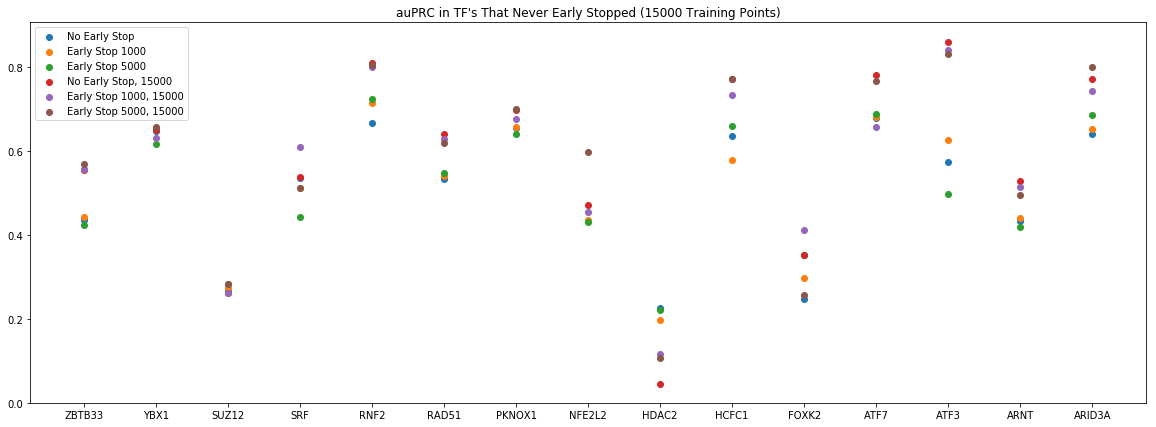

In [45]:
# Never Early Stopped with 15000 training points
never_stopped = df_cleaned[df_cleaned['Early 5000, 15000 Train Iters'] == 15000]

plt.figure(figsize=(20,7))
df_cleaned_sub = never_stopped
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in TF's That Never Early Stopped (15000 Training Points)")
plt.legend();

In [31]:
df_cleaned[df_cleaned['Early 1000 Train Iters'] == 4999].shape
'results/internals_results/epitome_results/{TF}_results/{TF}_no_motif_early_stop_1000.csv'

(39, 11)

In [34]:
df_cleaned[df_cleaned['Early 5000 Train Iters'] == 4999].shape
'results/internals_results/epitome_results/{TF}_results/{TF}_no_motif_early_stop_5000.csv'

(46, 11)

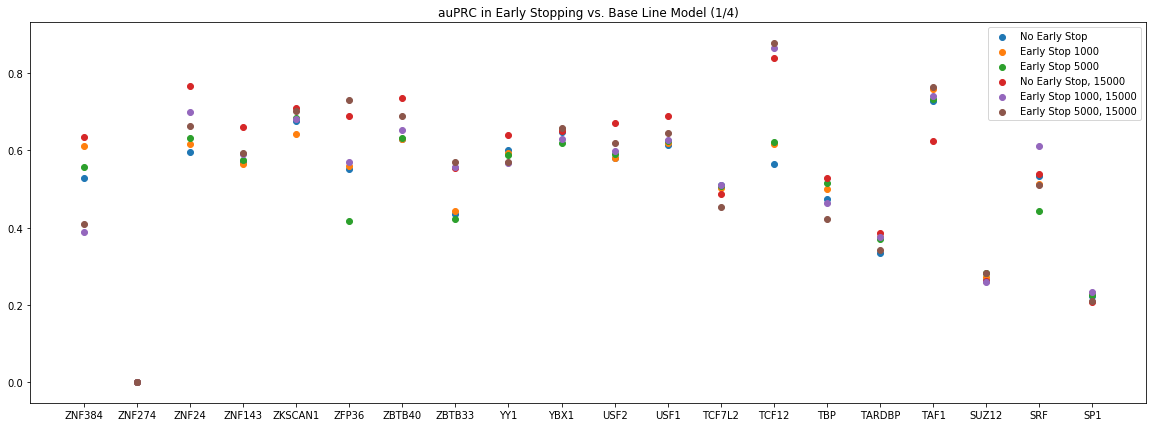

In [54]:
plt.figure(figsize=(20,7))
df_cleaned_sub = df_cleaned[:20]
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model (1/4)")
plt.legend();

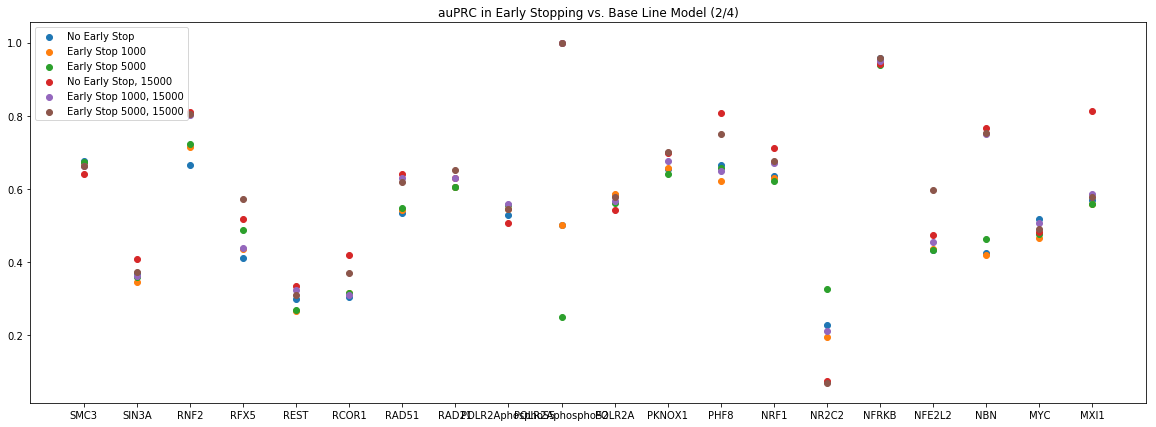

In [55]:
plt.figure(figsize=(20,7))
df_cleaned_sub = df_cleaned[20:40]
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model (2/4)")
plt.legend();

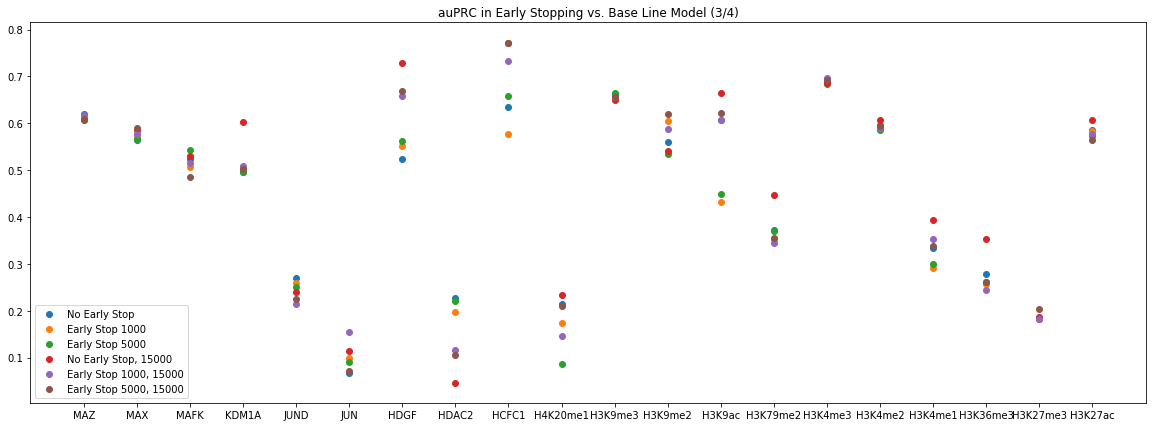

In [56]:
plt.figure(figsize=(20,7))
df_cleaned_sub = df_cleaned[40:60]
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'], label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model (3/4)")
plt.legend();

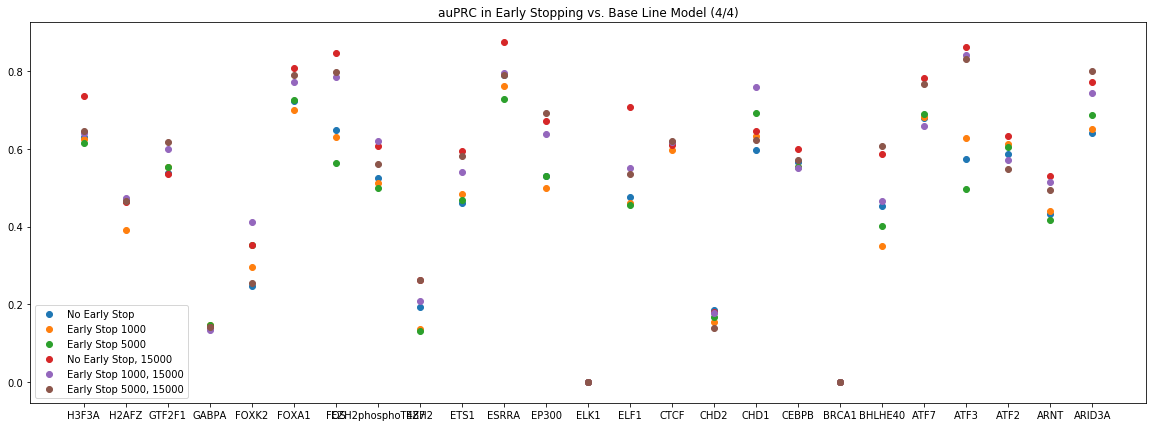

In [57]:
plt.figure(figsize=(20,7))
df_cleaned_sub = df_cleaned[60:]
x = np.arange(df_cleaned_sub.shape[0])
plt.scatter(x, df_cleaned_sub['No Early auPRC'].astype(float), label= 'No Early Stop')
plt.scatter(x, df_cleaned_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, df_cleaned_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.scatter(x, df_cleaned_sub['No Early 15000 auPRC'], label= 'No Early Stop, 15000')
plt.scatter(x, df_cleaned_sub['Early 1000, 15000 auPRC'], label= 'Early Stop 1000, 15000')
plt.scatter(x, df_cleaned_sub['Early 5000, 15000 auPRC'], label= "Early Stop 5000, 15000")
plt.xticks(x, labels=df_cleaned_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model (4/4)")
plt.legend();

In [132]:
no_early_better = df_cleaned[(df_cleaned['No Early auPRC'] > df_cleaned['Early 1000 auPRC'])
                             & (df_cleaned['No Early auPRC'] > df_cleaned['Early 5000 auPRC'])
                             & (df_cleaned['Early 1000 Train Iters'] != 4999)
                             & (df_cleaned['Early 1000 Train Iters'] != 4999)]
no_early_better.shape

(22, 11)

In [133]:
no_early_better

,Unnamed: 0,TF,No Early auROC,No Early auPRC,No Early Train Iters,Early 1000 auROC,Early 1000 auPRC,Early 1000 Train Iters,Early 5000 auROC,Early 5000 auPRC,Early 5000 Train Iters
8,8,YY1,0.995695,0.599897,5000.0,0.995548,0.592751,4000.0,0.995371,0.586339,4000.0
20,20,SMC3,0.998185,0.674650,5000.0,0.998566,0.668955,2000.0,0.998385,0.674031,2000.0
24,24,REST,0.995909,0.296683,5000.0,0.995923,0.264188,3000.0,0.996069,0.267499,3000.0
32,32,PHF8,0.997480,0.664534,5000.0,0.997425,0.621100,2000.0,0.997604,0.656664,4999.0
33,33,NRF1,0.996500,0.634734,5000.0,0.996655,0.628978,2000.0,0.996586,0.621049,4999.0
38,38,MYC,0.997820,0.517291,5000.0,0.996458,0.465180,3000.0,0.996350,0.474738,3000.0
39,39,MXI1,0.998914,0.570012,5000.0,0.998803,0.558553,3000.0,0.998861,0.557393,4000.0
40,40,MAZ,0.997535,0.619980,5000.0,0.997642,0.609888,3000.0,0.997576,0.609967,3000.0
47,47,HDAC2,0.998959,0.226111,5000.0,0.998779,0.197033,4000.0,0.998879,0.220567,4999.0
49,49,H4K20me1,0.933093,0.213658,5000.0,0.920111,0.173889,3000.0,0.829818,0.087204,1000.0


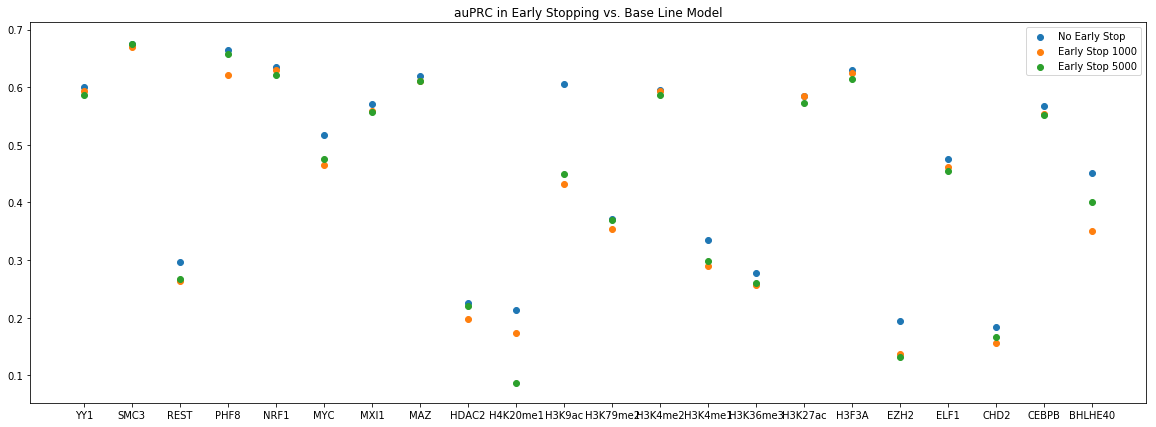

In [134]:
plt.figure(figsize=(20,7))
x = np.arange(no_early_better.shape[0])
plt.scatter(x, no_early_better['No Early auPRC'].astype(float), label= 'No Early Stop')
plt.scatter(x, no_early_better['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, no_early_better['Early 5000 auPRC'], label= "Early Stop 5000")
plt.xticks(x, labels=no_early_better['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model")
plt.legend();

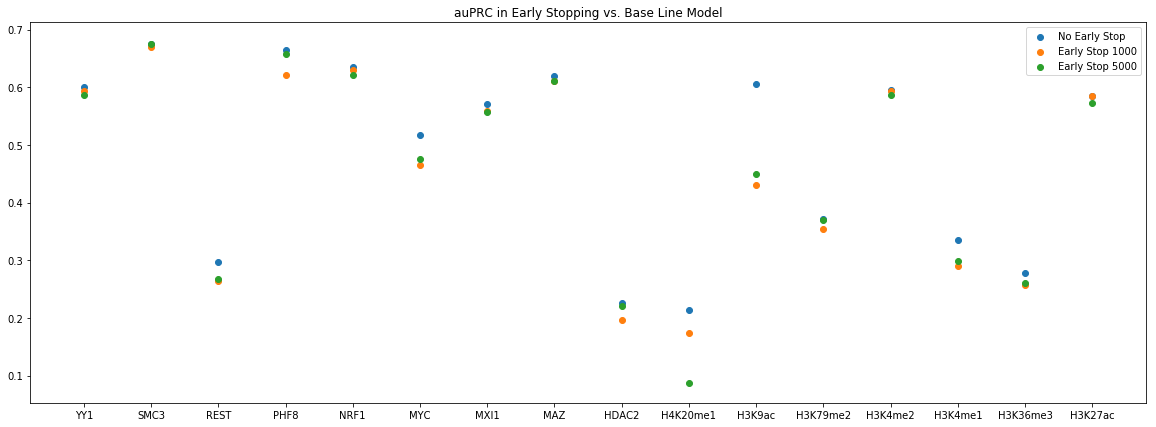

In [135]:
plt.figure(figsize=(20,7))
no_early_better_sub = no_early_better[:16]
x = np.arange(no_early_better_sub.shape[0])
plt.scatter(x, no_early_better_sub['No Early auPRC'].astype(float), label= 'No Early Stop')
plt.scatter(x, no_early_better_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, no_early_better_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.xticks(x, labels=no_early_better_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model")
plt.legend();

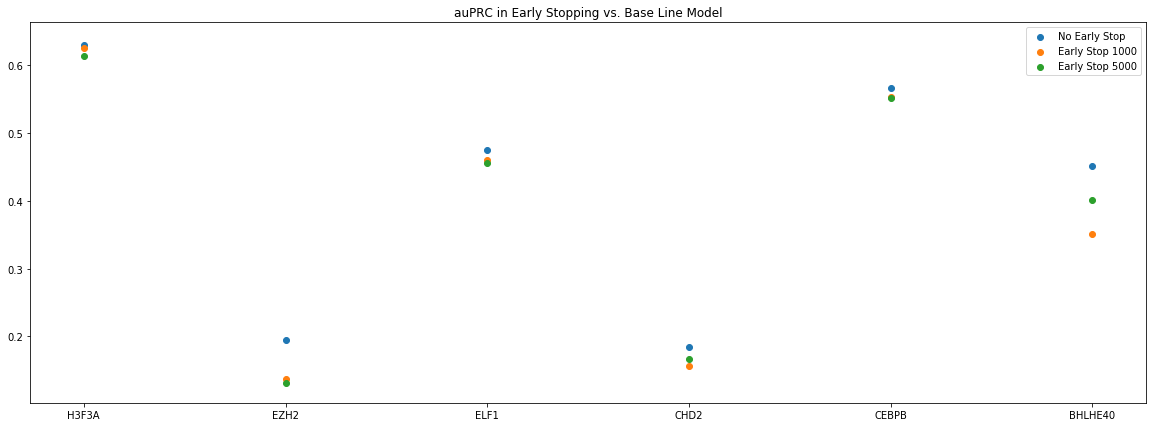

In [136]:
plt.figure(figsize=(20,7))
no_early_better_sub = no_early_better[16:]
x = np.arange(no_early_better_sub.shape[0])
plt.scatter(x, no_early_better_sub['No Early auPRC'].astype(float), label= 'No Early Stop')
plt.scatter(x, no_early_better_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, no_early_better_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.xticks(x, labels=no_early_better_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model")
plt.legend();

In [58]:
early_better_15000 = df_cleaned[(df_cleaned['No Early 15000 auPRC'] < df_cleaned['Early 1000, 15000 auPRC'])
                          | (df_cleaned['No Early 15000 auPRC'] < df_cleaned['Early 5000, 15000 auPRC'])]
early_better = early_better[(early_better['Early 1000, 15000 Train Iters'] != 15000)
            & (early_better['Early 5000, 15000 Train Iters'] != 15000)]
early_better.shape

(27, 20)

In [59]:
early_better

,Unnamed: 0,TF,No Early auROC,No Early auPRC,No Early Train Iters,Early 1000 auROC,Early 1000 auPRC,Early 1000 Train Iters,Early 5000 auROC,Early 5000 auPRC,Early 5000 Train Iters,No Early 15000 auROC,No Early 15000 auPRC,No Early 15000 Train Iters,"Early 1000, 15000 auROC","Early 1000, 15000 auPRC","Early 1000, 15000 Train Iters","Early 5000, 15000 auROC","Early 5000, 15000 auPRC","Early 5000, 15000 Train Iters"
5,5,ZFP36,0.998774,0.550187,4999.0,0.998962,0.560030,3000.0,0.998686,0.417338,3000.0,0.999374,0.689510,15000.0,0.999137,0.569951,0,0.999362,0.728405,8000.0
12,12,TCF7L2,0.997943,0.510855,5000.0,0.997590,0.501738,4999.0,0.997891,0.507189,4000.0,0.997991,0.487109,15000.0,0.997915,0.511083,0,0.997194,0.454075,12000.0
13,13,TCF12,0.996856,0.564933,5000.0,0.997643,0.615878,4999.0,0.997678,0.621699,4999.0,0.998608,0.838401,15000.0,0.998676,0.864154,0,0.999091,0.878073,14000.0
16,16,TAF1,0.998671,0.726732,5000.0,0.999212,0.758642,3000.0,0.999092,0.732722,4999.0,0.996942,0.622551,15000.0,0.998985,0.739740,0,0.999132,0.763058,6000.0
19,19,SP1,0.991056,0.224026,5000.0,0.992476,0.231611,4999.0,0.991136,0.225018,4999.0,0.972006,0.208274,15000.0,0.992356,0.233192,0,0.980950,0.211370,12000.0
20,20,SMC3,0.998185,0.674650,5000.0,0.998566,0.668955,2000.0,0.998385,0.674031,2000.0,0.996031,0.640346,15000.0,0.997396,0.661104,0,0.997757,0.663274,7000.0
23,23,RFX5,0.997115,0.409227,5000.0,0.996715,0.434199,4999.0,0.997098,0.487212,4999.0,0.996698,0.517220,15000.0,0.996281,0.436982,0,0.995681,0.571607,9000.0
27,27,RAD21,0.995211,0.604974,5000.0,0.995595,0.603323,4999.0,0.996293,0.604334,3000.0,0.995026,0.628656,15000.0,0.995166,0.627964,0,0.996149,0.651889,7000.0
28,28,POLR2AphosphoS5,0.994853,0.528166,5000.0,0.995352,0.543914,2000.0,0.995287,0.554139,3000.0,0.993382,0.507132,15000.0,0.995744,0.556927,0,0.995696,0.544290,4000.0
30,30,POLR2A,0.988828,0.581563,5000.0,0.989814,0.585189,3000.0,0.985983,0.561064,3000.0,0.975090,0.540772,15000.0,0.987312,0.565206,0,0.988343,0.575966,6000.0


In [145]:
early_better = df_cleaned[(df_cleaned['No Early auPRC'] < df_cleaned['Early 1000 auPRC'])
                          | (df_cleaned['No Early auPRC'] < df_cleaned['Early 5000 auPRC'])]
early_better = early_better[(early_better['Early 1000 Train Iters'] != 4999)
            & (early_better['Early 5000 Train Iters'] != 4999)]
early_better.shape

(11, 11)

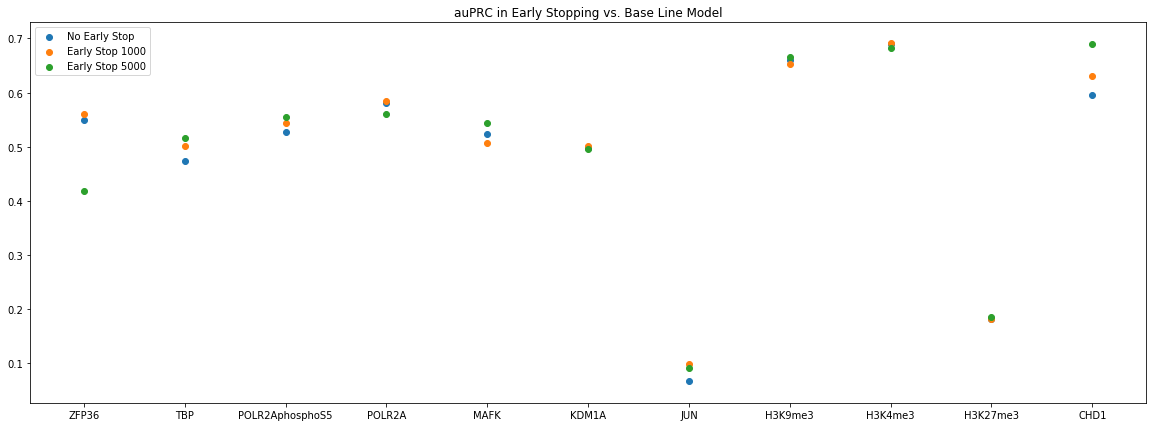

In [146]:
plt.figure(figsize=(20,7))
early_better_sub = early_better[:20]
x = np.arange(early_better_sub.shape[0])
plt.scatter(x, early_better_sub['No Early auPRC'].astype(float), label= 'No Early Stop')
plt.scatter(x, early_better_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, early_better_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.xticks(x, labels=early_better_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model")
plt.legend();

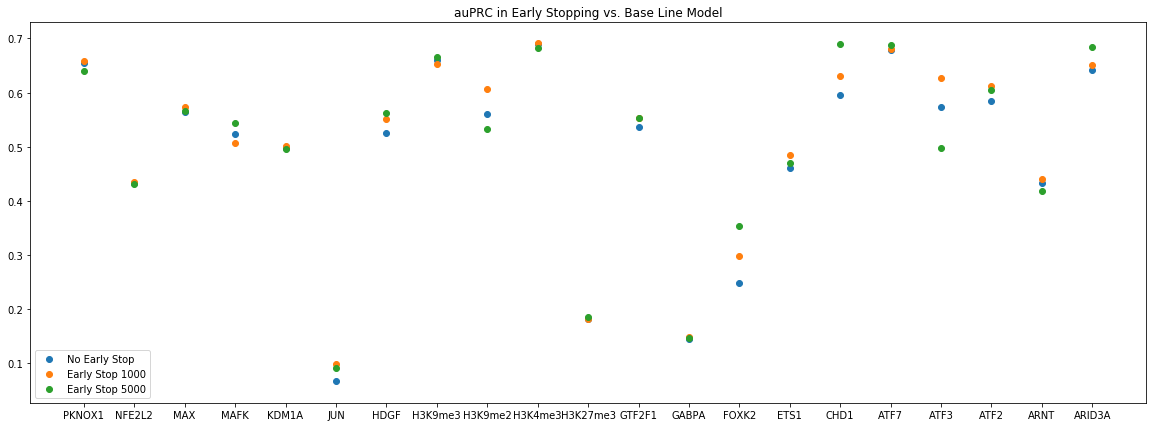

In [140]:
plt.figure(figsize=(20,7))
early_better_sub = early_better[20:]
x = np.arange(early_better_sub.shape[0])
plt.scatter(x, early_better_sub['No Early auPRC'].astype(float), label= 'No Early Stop')
plt.scatter(x, early_better_sub['Early 1000 auPRC'], label= 'Early Stop 1000')
plt.scatter(x, early_better_sub['Early 5000 auPRC'], label= "Early Stop 5000")
plt.xticks(x, labels=early_better_sub['TF'])
plt.title("auPRC in Early Stopping vs. Base Line Model")
plt.legend();

In [147]:
early_better

,Unnamed: 0,TF,No Early auROC,No Early auPRC,No Early Train Iters,Early 1000 auROC,Early 1000 auPRC,Early 1000 Train Iters,Early 5000 auROC,Early 5000 auPRC,Early 5000 Train Iters
5,5,ZFP36,0.998774,0.550187,4999.0,0.998962,0.560030,3000.0,0.998686,0.417338,3000.0
14,14,TBP,0.998228,0.473550,5000.0,0.998798,0.500732,3000.0,0.998721,0.515271,3000.0
28,28,POLR2AphosphoS5,0.994853,0.528166,5000.0,0.995352,0.543914,2000.0,0.995287,0.554139,3000.0
30,30,POLR2A,0.988828,0.581563,5000.0,0.989814,0.585189,3000.0,0.985983,0.561064,3000.0
42,42,MAFK,0.997653,0.524406,5000.0,0.996008,0.507432,2000.0,0.996241,0.543398,3000.0
43,43,KDM1A,0.987261,0.496772,5000.0,0.987550,0.501440,4000.0,0.987341,0.495416,4000.0
45,45,JUN,0.995973,0.066749,5000.0,0.997574,0.098566,3000.0,0.997274,0.090545,3000.0
50,50,H3K9me3,0.984731,0.661074,5000.0,0.983489,0.653013,2000.0,0.985142,0.665246,2000.0
54,54,H3K4me3,0.989733,0.689012,5000.0,0.989579,0.692475,4000.0,0.989522,0.683064,3000.0
58,58,H3K27me3,0.671117,0.182067,5000.0,0.685506,0.182421,2000.0,0.695509,0.185086,3000.0
